In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

df.info()
df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  Streami

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# TotalCharges is stored as an object (string) because:
# Some rows have values like ' ' (blank space), not true NaN.
# pd.read_csv() doesn’t detect them as missing automatically.

In [ ]:
df.drop('customerID', axis=1, inplace=True)
# unneccessary column

Text(0.5, 1.0, 'Churn Count')

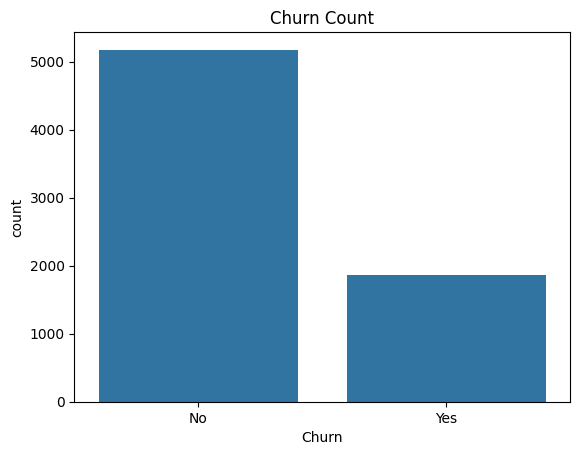

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title("Churn Count")

/tmp/ipython-input-65-1929735248.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plot[col] = df_plot[col].replace({'No': 0, 'Yes': 1, 'No internet service': 0})


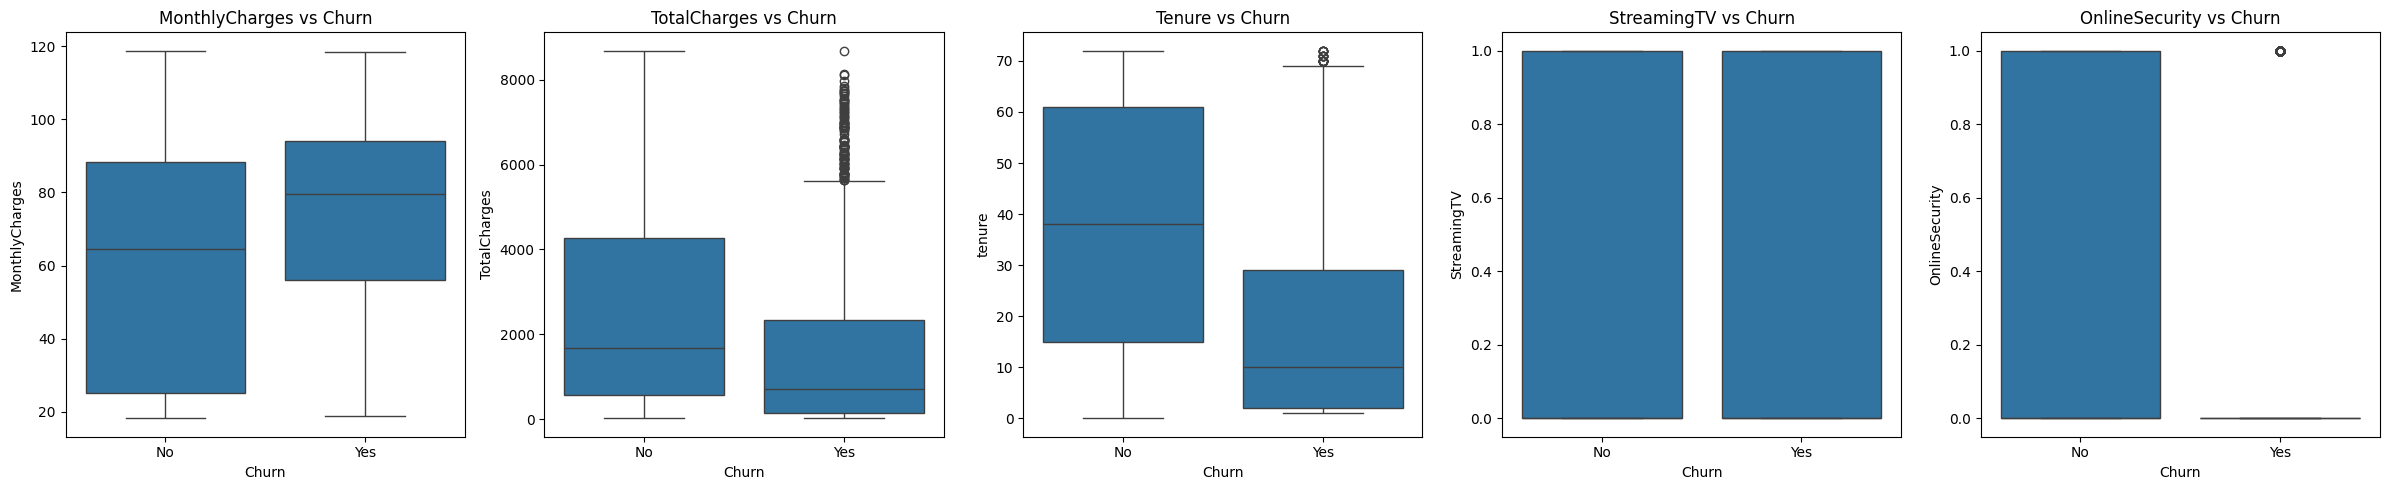

In [ ]:
# Optional: Convert categorical yes/no features to numeric for plotting
df_plot = df.copy()
binary_cols = ['StreamingTV', 'OnlineSecurity']
for col in binary_cols:
    df_plot[col] = df_plot[col].replace({'No': 0, 'Yes': 1, 'No internet service': 0})

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(24, 5))  # 1 row, 5 plots

# Boxplots
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_plot, ax=axes[0])
axes[0].set_title('MonthlyCharges vs Churn')

sns.boxplot(x='Churn', y='TotalCharges', data=df_plot, ax=axes[1])
axes[1].set_title('TotalCharges vs Churn')

sns.boxplot(x='Churn', y='tenure', data=df_plot, ax=axes[2])
axes[2].set_title('Tenure vs Churn')

sns.boxplot(x='Churn', y='StreamingTV', data=df_plot, ax=axes[3])
axes[3].set_title('StreamingTV vs Churn')

sns.boxplot(x='Churn', y='OnlineSecurity', data=df_plot, ax=axes[4])
axes[4].set_title('OnlineSecurity vs Churn')

plt.tight_layout()
plt.show()


*   People who churn tend to pay similar, **high monthly charges**.The lower whisker starts at a higher amount (let's say ₹70) → very few churners pay low charges
*   churned customers have lower total charges on average. Why? Likely because they haven't been with the company long, so they haven't accumulated high charges yet.
*   Most people who churn are new customers(low tenure)
*   StreamingTV doesn't influence churn/not churn. (There's no shift in medians or spread between the two boxes.)
*  Churned customers do not have online security. Indicates strong influence of online security.





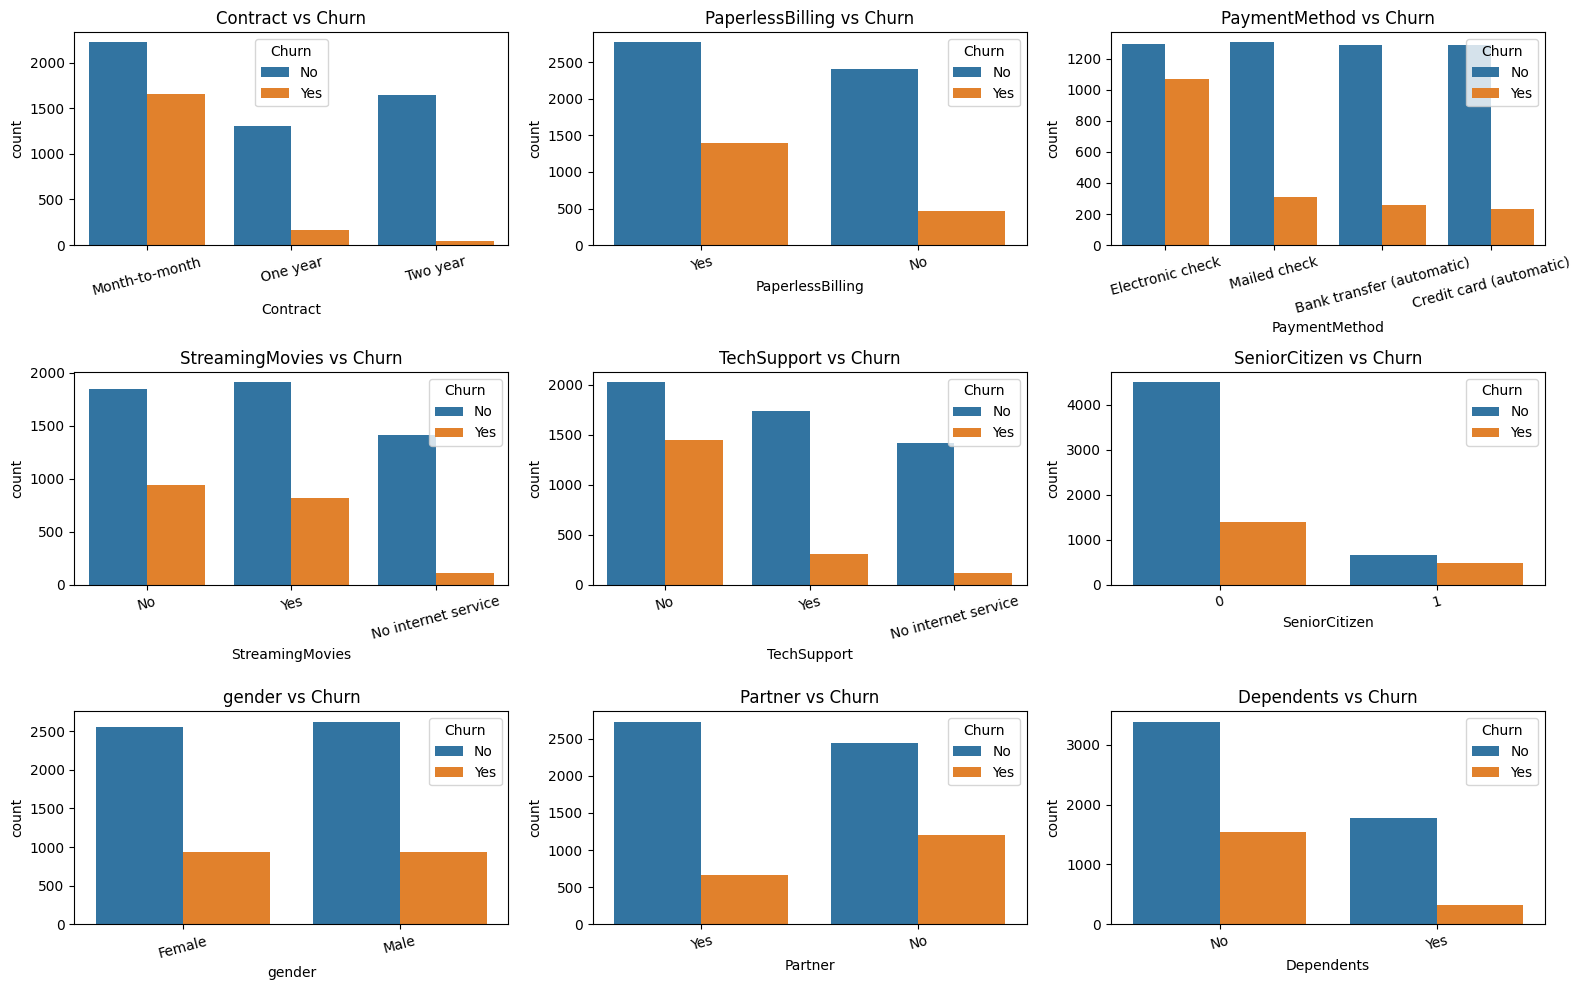

In [ ]:
cols = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'StreamingMovies','TechSupport','SeniorCitizen','gender','Partner','Dependents']

plt.figure(figsize=(16, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

* Month-to-month customers have very high churn compared to others.
* Electronic check users churn a lot more than those using mailed check, bank transfer, credit card
* StreamingMovies,gender not much significant impact

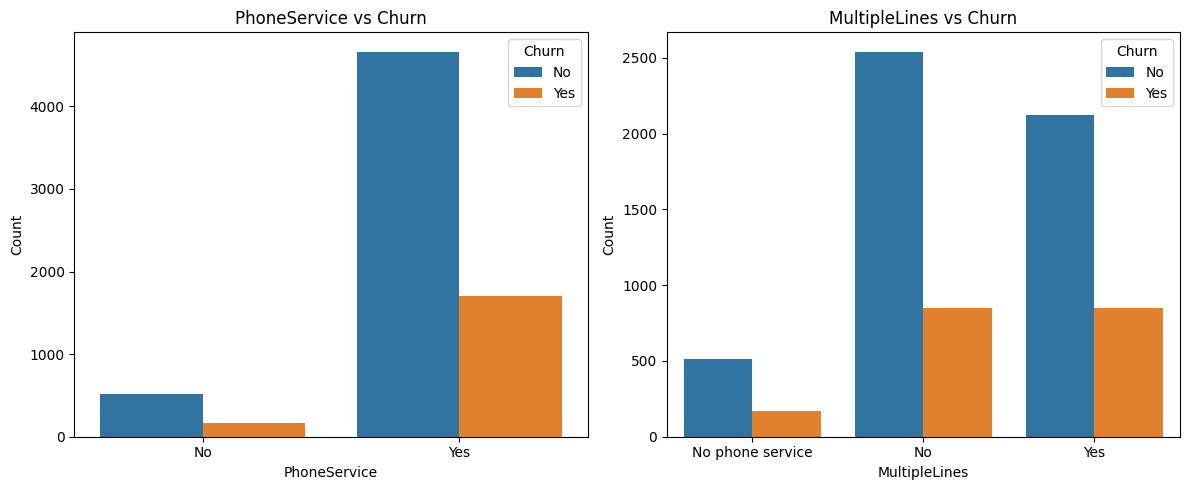

In [ ]:
plt.figure(figsize=(12, 5))

# Plot 1 - PhoneService vs Churn
plt.subplot(1, 2, 1)
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('PhoneService vs Churn')
plt.xlabel('PhoneService')
plt.ylabel('Count')

# Plot 2 - MultipleLines vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('MultipleLines vs Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

* There's no visible strong pattern that suggests PhoneService influences churn. In both cases (Yes and No), the majority class is No Churn — but that might just reflect the overall imbalance.
* For both "No" and "Yes" values (ignoring "No phone service"), churn counts are visibly quite similar. There doesn' t appear to be a strong predictive difference in churn between "Yes" and "No" for MultipleLines.

**PhoneService,MultipleLines** not useful

In [ ]:
cols_to_drop = [ 'MultipleLines','gender', 'StreamingMovies', 'StreamingTV']
df = df.drop(columns=cols_to_drop)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


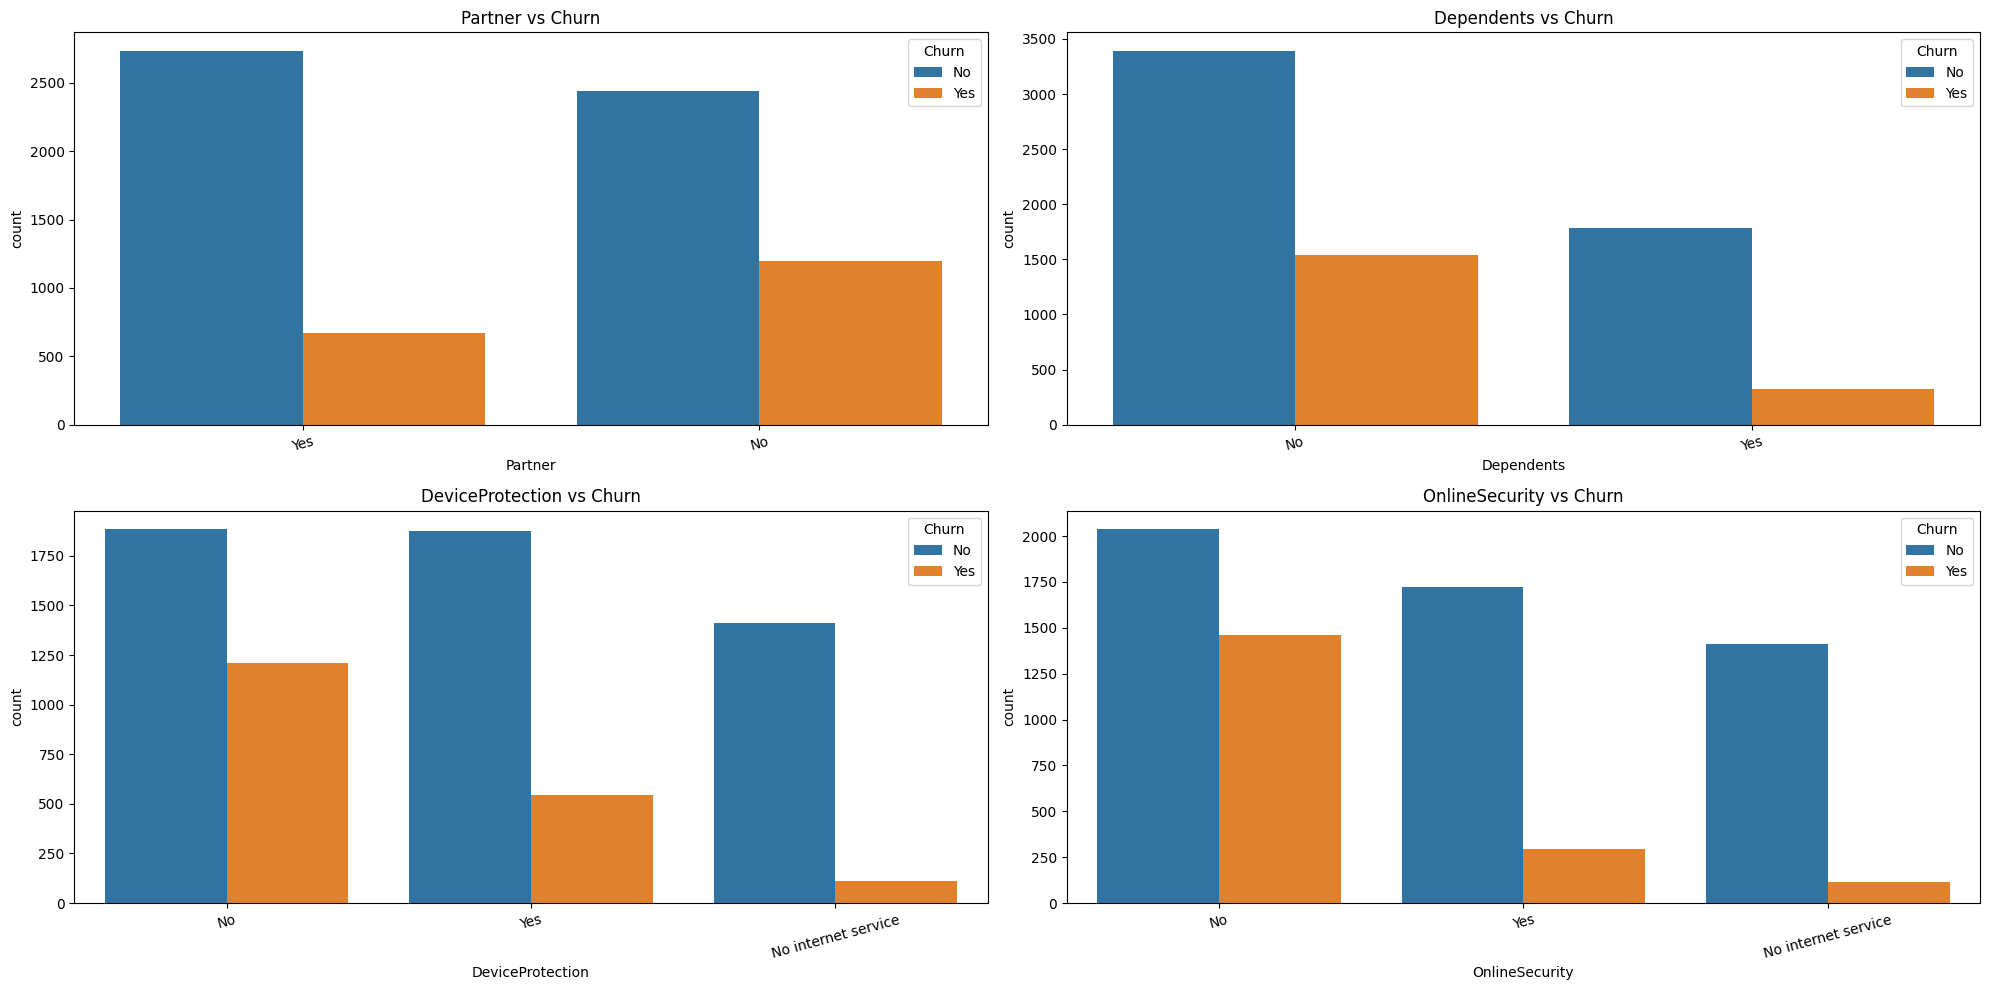

In [ ]:

cols=['Partner','Dependents','DeviceProtection','OnlineSecurity']

# cols=['Dependents','DeviceProtection','OnlineSecurity']
# df.drop(cols,axis=1,inplace=True)
plt.figure(figsize=(20, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

no need to remove/combine partner and dependents

In [ ]:
# Step 1: Contingency table
contingency = pd.crosstab(df['OnlineSecurity'], df['DeviceProtection'])
print("Contingency Table:\n", contingency)

Contingency Table:
 DeviceProtection       No  No internet service   Yes
OnlineSecurity                                      
No                   2187                    0  1311
No internet service     0                 1526     0
Yes                   908                    0  1111


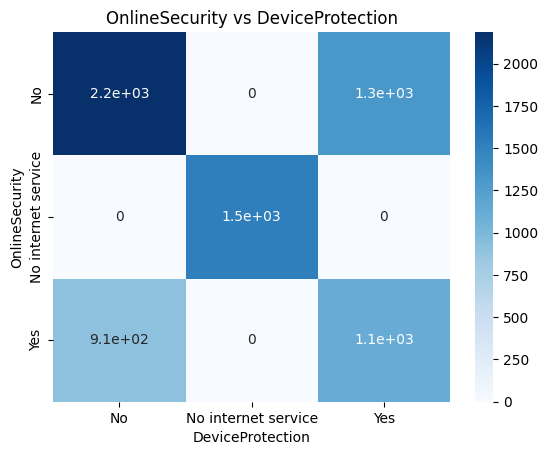

In [ ]:
sns.heatmap(contingency, annot=True, cmap="Blues")
plt.title("OnlineSecurity vs DeviceProtection")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))  # bias correction
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_score = cramers_v(contingency)
print(f"Cramér's V between OnlineSecurity and DeviceProtection: {cramers_v_score:.3f}")

Cramér's V between OnlineSecurity and DeviceProtection: 0.717


In [ ]:
subset_df = df[
    (df['OnlineSecurity'] != 'No internet service') &
    (df['DeviceProtection'] != 'No internet service')
]

contingency = pd.crosstab(subset_df['OnlineSecurity'], subset_df['DeviceProtection'])
print("Contingency Table:\n", contingency)

cramers_v_score = cramers_v(contingency)
print(f"Cramér's V (after removing 'No internet service'): {cramers_v_score:.3f}")


Contingency Table:
 DeviceProtection    No   Yes
OnlineSecurity              
No                2187  1311
Yes                908  1111
Cramér's V (after removing 'No internet service'): 0.169


**combining online security and device protection in 1 column**

In [ ]:
# def combine_security_protection(row):
#     if row['OnlineSecurity'] == 'Yes' or row['DeviceProtection'] == 'Yes':
#         return 'Yes'
#     elif row['OnlineSecurity'] == 'No internet service':
#         return 'No internet service'
#     else:
#         return 'No'

# df['HasSecurityProtection'] = df.apply(combine_security_protection, axis=1)
# cols_to_drop = ['OnlineSecurity', 'DeviceProtection']
# df = df.drop(columns=cols_to_drop)
# df.head()

In [ ]:
# List of binary columns with Yes/No values
binary_cols = ['Partner', 'Dependents', 'PaperlessBilling','PhoneService']

# Convert Yes/No to 1/0
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Check result
print(df[binary_cols].head())


   Partner  Dependents  PaperlessBilling  PhoneService
0        1           0                 1             0
1        0           0                 0             1
2        0           0                 1             1
3        0           0                 0             0
4        0           0                 1             1


In [ ]:
# # One-Hot Encode with drop_first=True
# cols_to_ohe = ['OnlineBackup', 'TechSupport', 'HasSecurityProtection']
# df = pd.get_dummies(df, columns=cols_to_ohe, drop_first=True)

# # Identify 'No internet service' columns created by get_dummies
# no_internet_cols = [col for col in df.columns if 'No internet service' in col]

# # Combine 'No internet service' columns into one
# df['NoInternetService'] = df[no_internet_cols].max(axis=1)

# # Drop the original 'No internet service' columns
# df.drop(columns=no_internet_cols, inplace=True)

# # Check the updated DataFrame
# print(df.head())
# print(df.columns)

# One-Hot Encode selected categorical features (including OnlineSecurity & DeviceProtection)
cols_to_ohe = ['OnlineSecurity', 'DeviceProtection', 'OnlineBackup', 'TechSupport']

# Apply get_dummies with drop_first=True for binary encoding (avoids dummy variable trap)- — where the columns are linearly dependent (i.e., if you know 2, you can predict the 3rd).
df = pd.get_dummies(df, columns=cols_to_ohe, drop_first=True)
# get_dummies- It converts categorical columns (like 'Yes', 'No', 'No internet service') into separate binary (0/1) columns — a process called one-hot encoding.


# Identify any dummy columns representing 'No internet service'
no_internet_cols = [col for col in df.columns if 'No internet service' in col]

# Combine them into a single binary column: 'NoInternetService'
if no_internet_cols:
    df['NoInternetService'] = df[no_internet_cols].max(axis=1)
    # It creates a new column: NoInternetService. For each customer:
    # If they have 'No internet service' in any of those 4 service columns → they probably don’t have internet at all
    # So this new column will mark that as 1 (True)

    # Drop the separate 'No internet service' dummy columns
    df.drop(columns=no_internet_cols, inplace=True)

# Check the updated DataFrame
print(df.head())
print(df.columns)



   SeniorCitizen  Partner  Dependents  tenure  PhoneService InternetService  \
0              0        1           0       1             0             DSL   
1              0        0           0      34             1             DSL   
2              0        0           0       2             1             DSL   
3              0        0           0      45             0             DSL   
4              0        0           0       2             1     Fiber optic   

         Contract  PaperlessBilling              PaymentMethod  \
0  Month-to-month                 1           Electronic check   
1        One year                 0               Mailed check   
2  Month-to-month                 1               Mailed check   
3        One year                 0  Bank transfer (automatic)   
4  Month-to-month                 1           Electronic check   

   MonthlyCharges  TotalCharges Churn  OnlineSecurity_Yes  \
0           29.85         29.85    No               False   
1     

In [ ]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'OnlineSecurity_Yes',
       'DeviceProtection_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'NoInternetService'],
      dtype='object')

In [ ]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_Yes,DeviceProtection_Yes,OnlineBackup_Yes,TechSupport_Yes,NoInternetService
0,0,1,0,1,0,DSL,Month-to-month,1,Electronic check,29.85,29.85,No,False,False,True,False,False
1,0,0,0,34,1,DSL,One year,0,Mailed check,56.95,1889.50,No,True,True,False,False,False
2,0,0,0,2,1,DSL,Month-to-month,1,Mailed check,53.85,108.15,Yes,True,False,True,False,False
3,0,0,0,45,0,DSL,One year,0,Bank transfer (automatic),42.30,1840.75,No,True,True,False,True,False
4,0,0,0,2,1,Fiber optic,Month-to-month,1,Electronic check,70.70,151.65,Yes,False,False,False,False,False


In [ ]:
# # Convert 'Churn' column to numeric: Yes → 1, No → 0
# df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# # Verify conversion
# print(df['Churn'].value_counts())


In [ ]:
df['Churn']

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make a copy of the cleaned base DataFrame
df_ohe = df.copy()
df_label = df.copy()

# Step 1: Encode Churn (target variable) in both
for d in [df_ohe, df_label]:
    d['Churn'] = d['Churn'].map({'Yes': 1, 'No': 0})

# Step 2: Columns to encode
multi_cat_cols = ['PaymentMethod', 'Contract', 'InternetService']

# --- df_ohe: One-Hot Encoding for linear models ---
df_ohe = pd.get_dummies(df_ohe, columns=multi_cat_cols, drop_first=True)
# ohe Works well for linear models, which assume independent numeric features

# --- df_label: Label Encoding for Random Forest ---
le = LabelEncoder()
for col in multi_cat_cols:
    df_label[col] = le.fit_transform(df_label[col])
    # LabelEncoder expects a single column (a 1D Series), not multiple columns or a DataFrame.

# Final check
print("df_ohe shape:", df_ohe.shape)
print("df_label shape:", df_label.shape)


df_ohe shape: (7043, 21)
df_label shape: (7043, 17)


In [ ]:
df_ohe.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_Yes,...,OnlineBackup_Yes,TechSupport_Yes,NoInternetService,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,1,29.85,29.85,0,False,...,True,False,False,False,True,False,False,False,False,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,True,False,False,False
2,0,0,0,2,1,1,53.85,108.15,1,True,...,True,False,False,False,False,True,False,False,False,False
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,False,True,False,False,False,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
cols_to_scale = ['MonthlyCharges', 'TotalCharges']

# Coerce TotalCharges to numeric and convert blanks to NaN
df_ohe['TotalCharges'] = pd.to_numeric(df_ohe['TotalCharges'], errors='coerce')
df_ohe['MonthlyCharges'] = pd.to_numeric(df_ohe['MonthlyCharges'], errors='coerce')  # Just in case

# Option 1: Drop rows with missing TotalCharges
# df_ohe.dropna(subset=['TotalCharges', 'MonthlyCharges'], inplace=True)

# OR Option 2: Fill with median (safer if dataset is large)
df_ohe['TotalCharges'].fillna(df_ohe['TotalCharges'].median(), inplace=True)


# Initialize scaler
scaler = StandardScaler()

# Apply scaling only to these columns in df_ohe
df_ohe[cols_to_scale] = scaler.fit_transform(df_ohe[cols_to_scale])
# StandardScaler accepts multiple columns — i.e., a DataFrame (2D).

# Check scaled values
print(df_ohe[cols_to_scale].describe())

       MonthlyCharges  TotalCharges
count    7.043000e+03  7.043000e+03
mean    -6.406285e-17 -1.488074e-17
std      1.000071e+00  1.000071e+00
min     -1.545860e+00 -9.991203e-01
25%     -9.725399e-01 -8.298459e-01
50%      1.857327e-01 -3.904632e-01
75%      8.338335e-01  6.642871e-01
max      1.794352e+00  2.826743e+00


/tmp/ipython-input-83-3910382072.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ohe['TotalCharges'].fillna(df_ohe['TotalCharges'].median(), inplace=True)


In [ ]:
print(df_ohe[cols_to_scale].head())
print(df_ohe.dtypes)

   MonthlyCharges  TotalCharges
0       -1.160323     -0.994242
1       -0.259629     -0.173244
2       -0.362660     -0.959674
3       -0.746535     -0.194766
4        0.197365     -0.940470
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
OnlineSecurity_Yes                          bool
DeviceProtection_Yes                        bool
OnlineBackup_Yes                            bool
TechSupport_Yes                             bool
NoInternetService                           bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed che

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



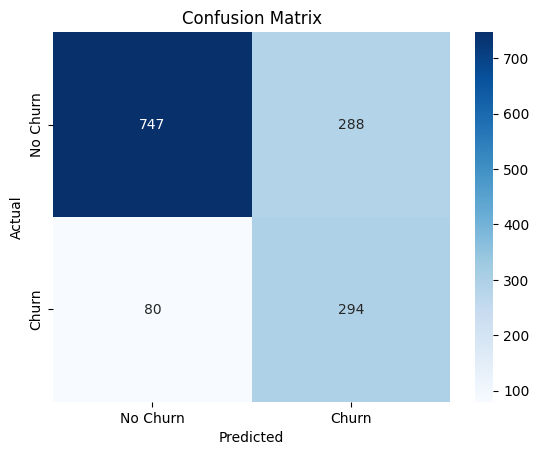

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: X/y split
X = df_ohe.drop('Churn', axis=1)
y = df_ohe['Churn']

# Step 2: Train-test split (with stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
# Splits data: 80% for training, 20% for testing
# stratify=y: Ensures class proportions (churn vs. no churn) stay the same in both sets
# Setting random_state ensures reproducibility — train-test split or random forest behavior stays the same each time I run the code, which helps in debugging, comparing models, and sharing results with others
# It preserves the same class ratio in both training and test sets.
# Example: If 26% of your customers churn (y=1) in the full dataset, then both training and test sets will also have ~26% churn.

# ✅ So: This helps ensure your evaluation metrics are not biased by class imbalance.

# ❌ But it does not fix the imbalance inside the model training itself.

# Step 3: Impute missing values using the mean of the training data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# .fit_transform() on training data only
# .transform() on test data, using the parameters learned from training
# better  than fillna is that it can take entire dataframe as input and better suitable for pipelines


# Step 4: Train Logistic Regression with class_weight='balanced'
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
logreg.fit(X_train, y_train)
# class_weight='balanced'- This tells the model: Hey, since class 1 (churn) is rare, make its mistakes more costly than mistakes on the majority class (no churn).
# solver='liblinear'- In theory, I learned logistic regression with gradient descent, where we iteratively update weights to minimize loss.
# But in practice, libraries like Sklearn use more advanced solvers like 'liblinear' or 'lbfgs', which are optimized for speed and convergence.
# 'liblinear' uses coordinate descent, while 'lbfgs' and 'saga' are gradient-based and suitable for large datasets.

# COordinate descent- It updates one weight at a time, while keeping others fixed. This is efficient when the number of features is moderate (like in one-hot encoded data)
# Let’s say your loss function is like a bowl (in 3D), and the two weights 𝜃1,θ2, are along the x- and y-axes.
# Gradient descent moves diagonally toward the bottom
# Coordinate descent takes turns moving: First along x-axis( theta1), then along y-axis(theta2) and repeats
# It's like moving in an L-shaped pattern, step by step.

# saga- (Stochastic average gradient augmented)- An improved variant of the SGD (Stochastic Gradient Descent) optimizer.
# Works with sparse data and supports both L1 and L2 regularization.
# Suitable for large-scale datasets.

# Step 5: Predictions
y_pred = logreg.predict(X_test)

# Step 6: Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_proba = logreg.predict_proba(X_test)[:, 1]  # Probability of Churn


* macro avg- treat both churners (1) and non-churners (0) equally — no matter how many of them are in the dataset.
* weighted avg- look at how many churners and non-churners we actually had. Let's give more weight to the class that has more rows

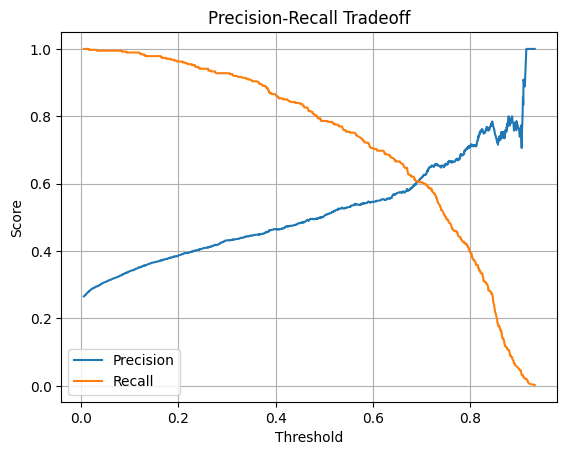

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall Tradeoff')
plt.grid()
plt.show()



Classification Report (Threshold = 0.6):
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.55      0.70      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409



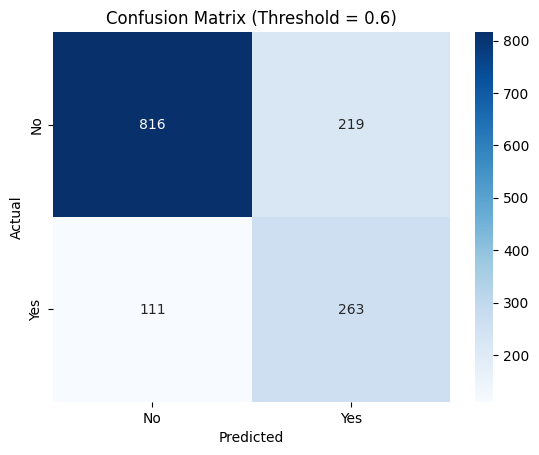

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Example threshold
threshold = 0.6
y_pred_custom = (y_proba >= threshold).astype(int)

# Evaluate
print(f"\nClassification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_custom))

conf_matrix = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# prompt: code to give accuracy of above logistic regression model

# Get accuracy directly from the classification report or from the confusion matrix
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7388


**RANDOM FOREST**

Accuracy: 0.7842441447835344

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



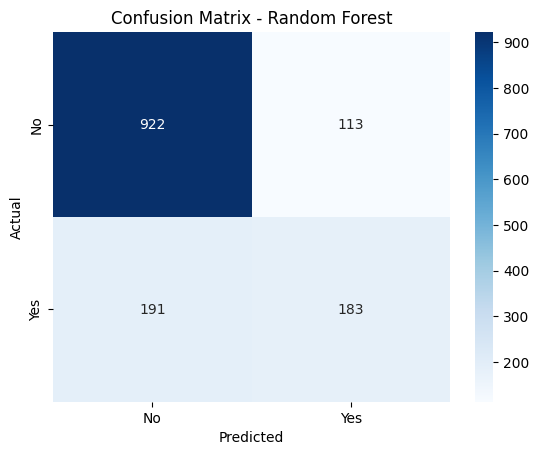

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split features and target
# cols=['SeniorCitizen','Dependents','Partner','NoInternetService']
# df_label.drop(cols,axis=1,inplace=True)
X = df_label.drop('Churn', axis=1)
y = df_label['Churn']

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = rf_model.predict(X_test)

# Step 5: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Accuracy: 0.7835344215755855

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



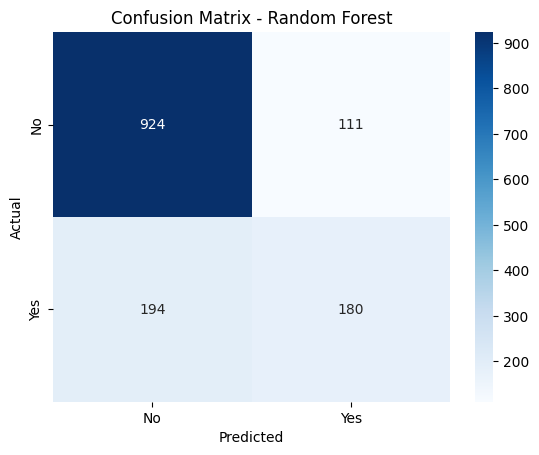

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Split features and target
# cols=['SeniorCitizen','Dependents','Partner','NoInternetService']
# df_label.drop(cols,axis=1,inplace=True)
X = df_label.drop('Churn', axis=1)
y = df_label['Churn']

# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=442)
rf_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = rf_model.predict(X_test)

# Step 5: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


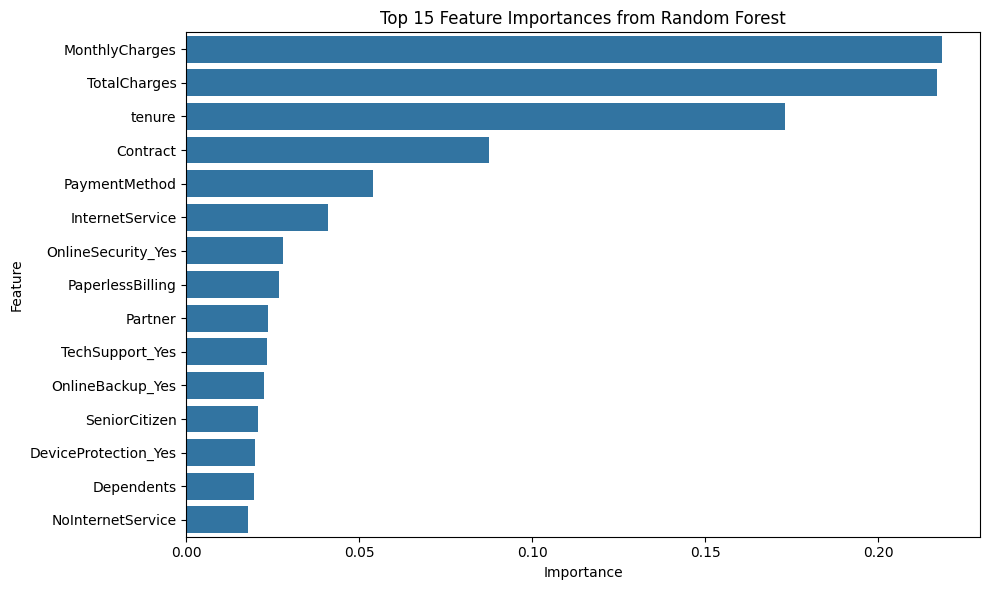

In [ ]:
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))  # top 15 important features
plt.title('Top 15 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()


In [ ]:
df_label.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'OnlineSecurity_Yes',
       'DeviceProtection_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'NoInternetService'],
      dtype='object')

Accuracy: 0.7821149751596878

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



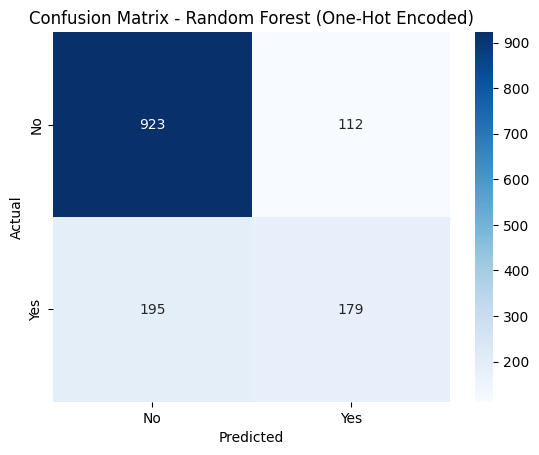

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Separate features and target
X = df_ohe.drop('Churn', axis=1)
y = df_ohe['Churn']

# Step 2: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Train Random Forest model
rf_ohe = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_ohe = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

rf_ohe.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = rf_ohe.predict(X_test)

# Step 5: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Random Forest (One-Hot Encoded)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
df_ohe.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_Yes,...,OnlineBackup_Yes,TechSupport_Yes,NoInternetService,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,1,-1.160323,-0.994242,0,False,...,True,False,False,False,True,False,False,False,False,False
1,0,0,0,34,1,0,-0.259629,-0.173244,0,True,...,False,False,False,False,False,True,True,False,False,False
2,0,0,0,2,1,1,-0.362660,-0.959674,1,True,...,True,False,False,False,False,True,False,False,False,False
3,0,0,0,45,0,0,-0.746535,-0.194766,0,True,...,False,True,False,False,False,False,True,False,False,False
4,0,0,0,2,1,1,0.197365,-0.940470,1,False,...,False,False,False,False,True,False,False,False,True,False


**SVM**

Accuracy: 0.7487579843860894

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



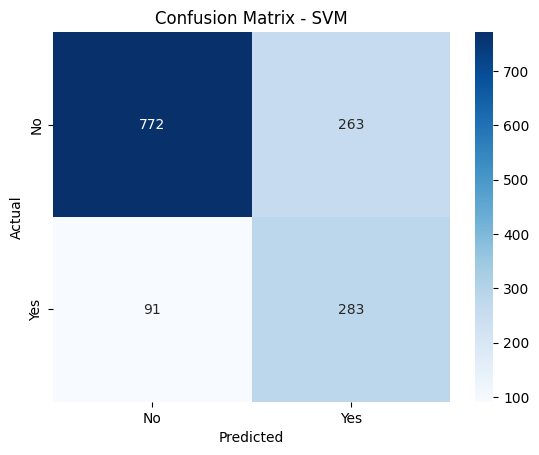

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

# Step 1: Feature-target split
X = df_ohe.drop('Churn', axis=1)
y = df_ohe['Churn']

# Step 2: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3.5: Impute missing values after scaling
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)


# Step 4: Train SVM (RBF kernel by default)
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate
y_pred = svm_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Decision Tree**

Accuracy: 0.7146912704045423

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1035
           1       0.46      0.47      0.47       374

    accuracy                           0.71      1409
   macro avg       0.63      0.64      0.64      1409
weighted avg       0.72      0.71      0.72      1409



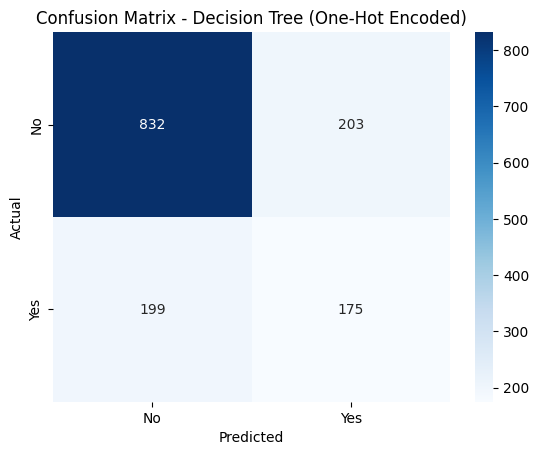

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Feature-target split
X = df_ohe.drop('Churn', axis=1)
y = df_ohe['Churn']

# Step 2: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Train Decision Tree model
dt_ohe_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_ohe_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = dt_ohe_model.predict(X_test)

# Step 5: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Decision Tree (One-Hot Encoded)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


* Random Forest is clearly the best so far, especially in terms of recall across both classes.

* SVM > Logistic, so non-linear decision boundaries helped.

* Decision Tree performs slightly worse — expected due to overfitting or instability

In [ ]:
df_label.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_Yes,DeviceProtection_Yes,OnlineBackup_Yes,TechSupport_Yes,NoInternetService
0,0,1,0,1,0,0,0,1,2,29.85,29.85,0,False,False,True,False,False
1,0,0,0,34,1,0,1,0,3,56.95,1889.50,0,True,True,False,False,False
2,0,0,0,2,1,0,0,1,3,53.85,108.15,1,True,False,True,False,False
3,0,0,0,45,0,0,1,0,0,42.30,1840.75,0,True,True,False,True,False
4,0,0,0,2,1,1,0,1,2,70.70,151.65,1,False,False,False,False,False


In [ ]:
df_ohe.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,OnlineSecurity_Yes,...,OnlineBackup_Yes,TechSupport_Yes,NoInternetService,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,0,1,-1.160323,-0.994242,0,False,...,True,False,False,False,True,False,False,False,False,False
1,0,0,0,34,1,0,-0.259629,-0.173244,0,True,...,False,False,False,False,False,True,True,False,False,False
2,0,0,0,2,1,1,-0.362660,-0.959674,1,True,...,True,False,False,False,False,True,False,False,False,False
3,0,0,0,45,0,0,-0.746535,-0.194766,0,True,...,False,True,False,False,False,False,True,False,False,False
4,0,0,0,2,1,1,0.197365,-0.940470,1,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
import numpy as np
import pandas as pd

def feature_engineering(df, is_label_encoded=True):
    df = df.copy()

    # Monthly * Tenure (Customer Lifetime Value approximation)
    if 'MonthlyCharges' in df.columns and 'tenure' in df.columns:
        df['Monthly*Tenure'] = df['MonthlyCharges'] * df['tenure']

    # Tenure Grouping
    if 'tenure' in df.columns:
        df['tenure_group'] = pd.cut(
            df['tenure'],
            bins=[0, 12, 24, 48, 72, np.inf],
            labels=["0-1y", "1-2y", "2-4y", "4-6y", "6y+"]
        )

    # Log Transformation
    # for col in ['MonthlyCharges', 'TotalCharges']:
    #     if col in df.columns:
    #         df[f'{col}_log'] = np.log1p(df[col])
    # Log Transformation (safe)
    for col in ['MonthlyCharges', 'TotalCharges']:
        if col in df.columns:
            df[f'{col}_log'] = np.log1p(df[col].clip(lower=0).fillna(0))


    # Only in df_label: combine Contract + PaymentMethod
    if is_label_encoded and 'Contract' in df.columns and 'PaymentMethod' in df.columns:
        df['Contract_Payment'] = df['Contract'].astype(str) + "_" + df['PaymentMethod'].astype(str)

    return df


In [ ]:
df_label_fe = feature_engineering(df_label, is_label_encoded=True)
df_ohe_fe = feature_engineering(df_ohe, is_label_encoded=False)


In [ ]:
# One-hot encode for df_label_fe
df_label_encoded = pd.get_dummies(df_label_fe, columns=['tenure_group', 'Contract_Payment'], drop_first=True)

# One-hot encode for df_ohe_fe
df_ohe_encoded = pd.get_dummies(df_ohe_fe, columns=['tenure_group'], drop_first=True)


In [ ]:
df_label_encoded.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,...,Contract_Payment_0_2,Contract_Payment_0_3,Contract_Payment_1_0,Contract_Payment_1_1,Contract_Payment_1_2,Contract_Payment_1_3,Contract_Payment_2_0,Contract_Payment_2_1,Contract_Payment_2_2,Contract_Payment_2_3
0,0,1,0,1,0,0,0,1,2,29.85,...,True,False,False,False,False,False,False,False,False,False
1,0,0,0,34,1,0,1,0,3,56.95,...,False,False,False,False,False,True,False,False,False,False
2,0,0,0,2,1,0,0,1,3,53.85,...,False,True,False,False,False,False,False,False,False,False
3,0,0,0,45,0,0,1,0,0,42.30,...,False,False,True,False,False,False,False,False,False,False
4,0,0,0,2,1,1,0,1,2,70.70,...,True,False,False,False,False,False,False,False,False,False


Accuracy: 0.7806955287437899

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



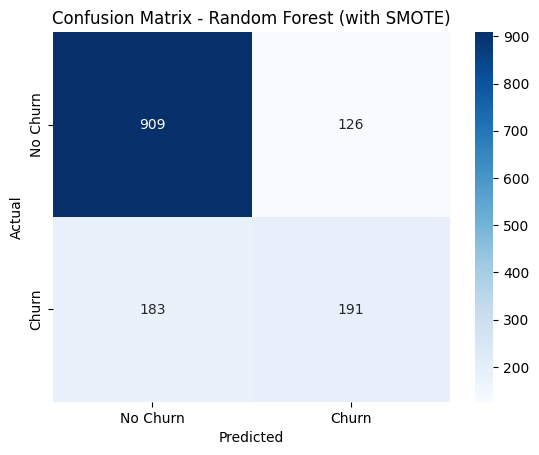


Top features used:
 ['MonthlyCharges_log', 'MonthlyCharges', 'TotalCharges_log', 'TotalCharges', 'Monthly*Tenure', 'tenure', 'Contract', 'Contract_Payment_0_2', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'tenure_group_4-6y', 'Partner', 'SeniorCitizen', 'OnlineSecurity_Yes']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# === Step 1: Separate features and target ===
X = df_label_encoded.drop('Churn', axis=1)
y = df_label_encoded['Churn']

# === Step 2: Remove low-variance features ===
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]

# === Step 3: Temporary Random Forest to select top features ===
temp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
temp_rf.fit(X_reduced, y)
importances = pd.Series(temp_rf.feature_importances_, index=selected_columns)
top_features = importances.sort_values(ascending=False).head(15).index.tolist()
X_top = X[top_features]

# Fill missing values before split
X_top_filled = X[top_features].fillna(0)

# Split after filling
X_train, X_test, y_train, y_test = train_test_split(
    X_top_filled, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 5: Impute missing values in the training set ===
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# === Step 6: Apply SMOTE on training set ===
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# === Step 7: Train final Random Forest model ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# === Step 8: Predictions and Evaluation ===
y_pred = rf_model.predict(X_test_imputed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Step 9: Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Random Forest (with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# === Optional: Show top features used ===
print("\nTop features used:\n", top_features)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7998580553584103

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



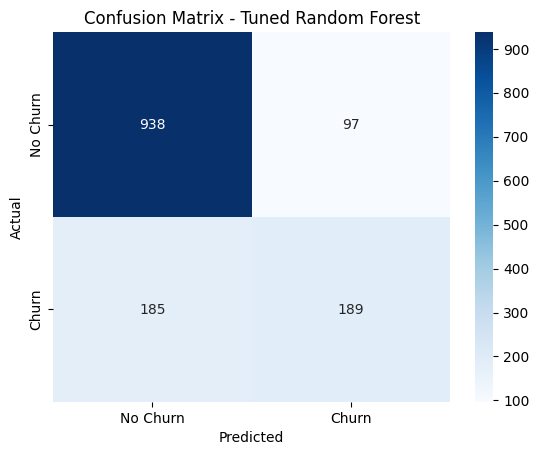

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Step 1: Prepare data ===
X = df_label_encoded.drop('Churn', axis=1)
y = df_label_encoded['Churn']

# === Step 2: Remove low-variance features ===
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)
selected_columns = X.columns[selector.get_support()]

# === Step 3: Temporary model to get top features ===
temp_rf = RandomForestClassifier(n_estimators=100, random_state=42)
temp_rf.fit(X_reduced, y)

importances = pd.Series(temp_rf.feature_importances_, index=selected_columns)
top_features = importances.sort_values(ascending=False).head(15).index.tolist()
X_top = X[top_features].fillna(0)  # Handle missing values

# === Step 4: Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 5: GridSearchCV for Random Forest ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

# === Step 6: Evaluation ===
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Step 7: Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/tmp/ipython-input-106-3531138219.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='viridis')


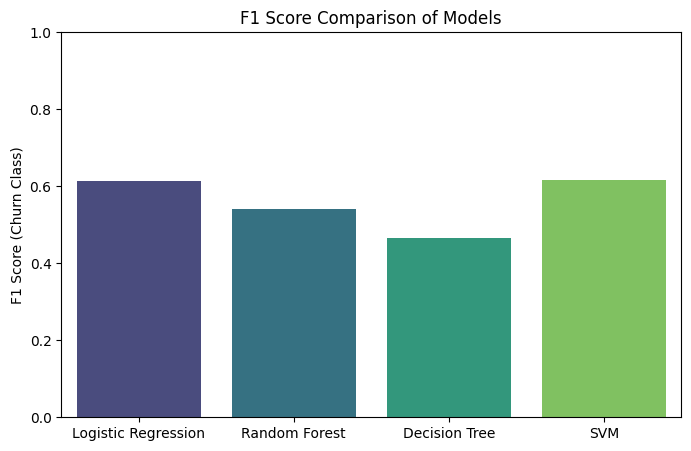

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Split data
X = df_ohe.drop('Churn', axis=1)
y = df_ohe['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Step 3: Scale for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train models and calculate F1 scores
f1_scores = {}

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
f1_scores['Logistic Regression'] = f1_score(y_test, y_pred_log)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
f1_scores['Random Forest'] = f1_score(y_test, y_pred_rf)

# Decision Tree
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
f1_scores['Decision Tree'] = f1_score(y_test, y_pred_dt)

# SVM
svm = SVC(kernel='rbf', class_weight='balanced', probability=False, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
f1_scores['SVM'] = f1_score(y_test, y_pred_svm)

# Step 5: Plot F1 scores
plt.figure(figsize=(8, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='viridis')
plt.ylabel("F1 Score (Churn Class)")
plt.title("F1 Score Comparison of Models")
plt.ylim(0, 1)
plt.show()


/tmp/ipython-input-107-523049417.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()), palette='mako')


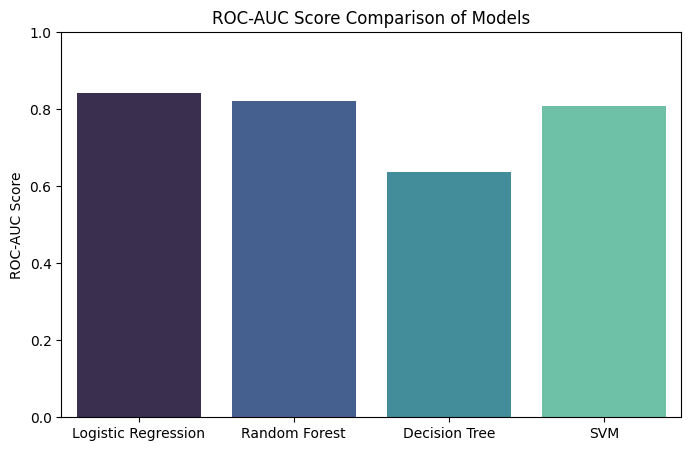

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_scores = {}

# Logistic Regression (uses predict_proba)
y_proba_log = logreg.predict_proba(X_test_scaled)[:, 1]
roc_auc_scores['Logistic Regression'] = roc_auc_score(y_test, y_proba_log)

# Random Forest
y_proba_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_scores['Random Forest'] = roc_auc_score(y_test, y_proba_rf)

# Decision Tree
y_proba_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_scores['Decision Tree'] = roc_auc_score(y_test, y_proba_dt)

# SVM (uses decision_function instead of predict_proba unless probability=True)
y_score_svm = svm.decision_function(X_test_scaled)
roc_auc_scores['SVM'] = roc_auc_score(y_test, y_score_svm)

# Plot ROC-AUC scores
plt.figure(figsize=(8, 5))
sns.barplot(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()), palette='mako')
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC Score Comparison of Models")
plt.ylim(0, 1)
plt.show()
